In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
from myPDS import compute_and_plot_fft, LowPassFIR


In [29]:
data = np.genfromtxt('system1_data.csv', delimiter=',')
sig_raw = data[:,1]
sig_raw = sig_raw[1:]

N = sig_raw.size
Fs = 10.0


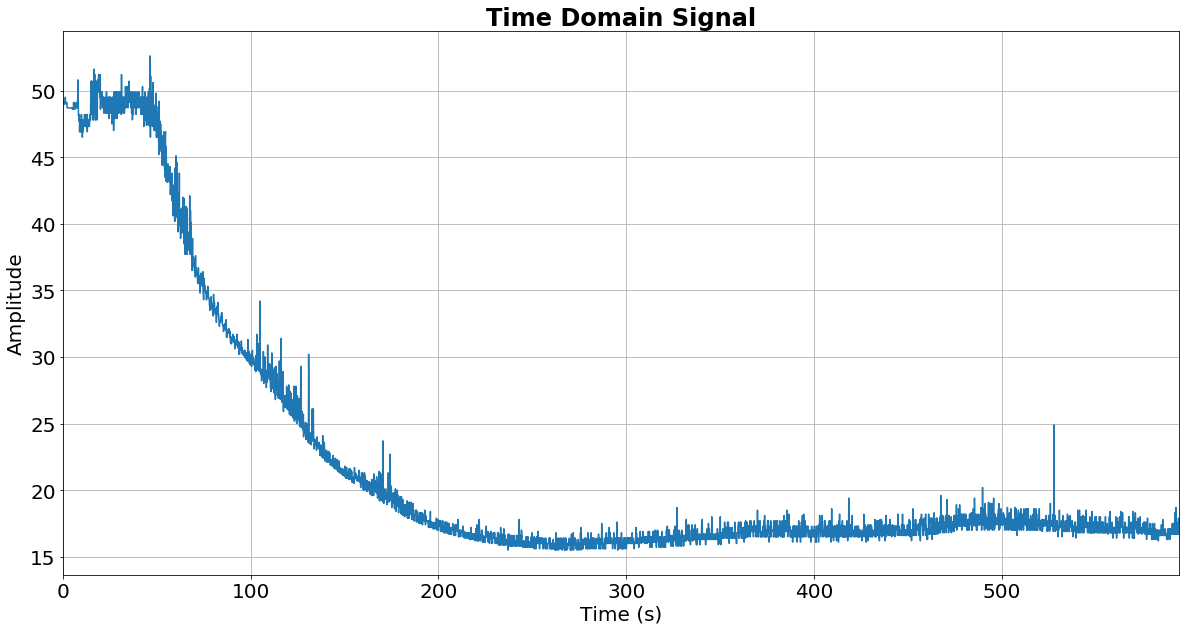

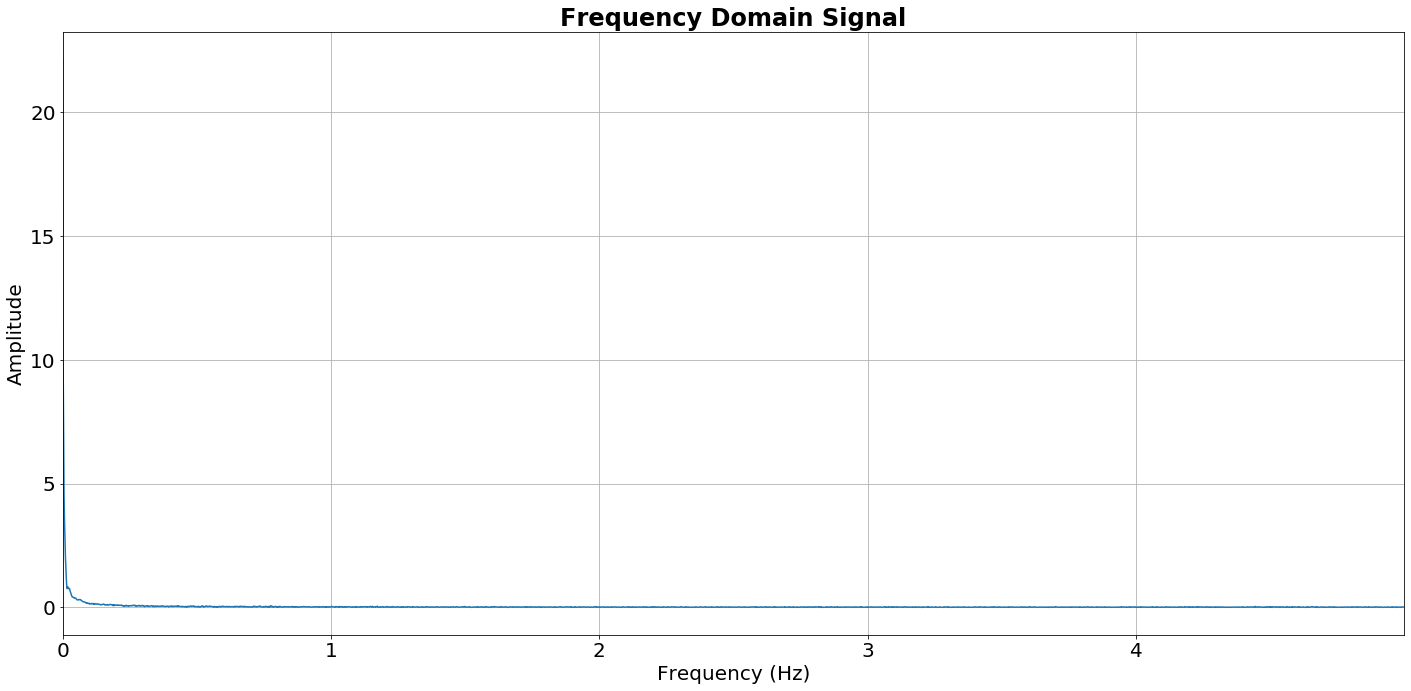

array([131562.8       +6.32027763e-12j,  24536.12461898-1.54467552e+04j,
         8439.99081975-1.86593063e+04j, ...,
         2073.2087455 +1.33034313e+04j,   8439.99081975+1.86593063e+04j,
        24536.12461898+1.54467552e+04j])

In [30]:
compute_and_plot_fft(sig_raw, Fs)

In [31]:
fir_lp = LowPassFIR(fc=0.1, transition_width=0.7, stopband_attenuation=50, passband_ripple=0.1, Fs=10)
b = fir_lp.getFilterCoeffs()


hamming


/tmp/ipykernel_27553/644421742.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(b.T)


49

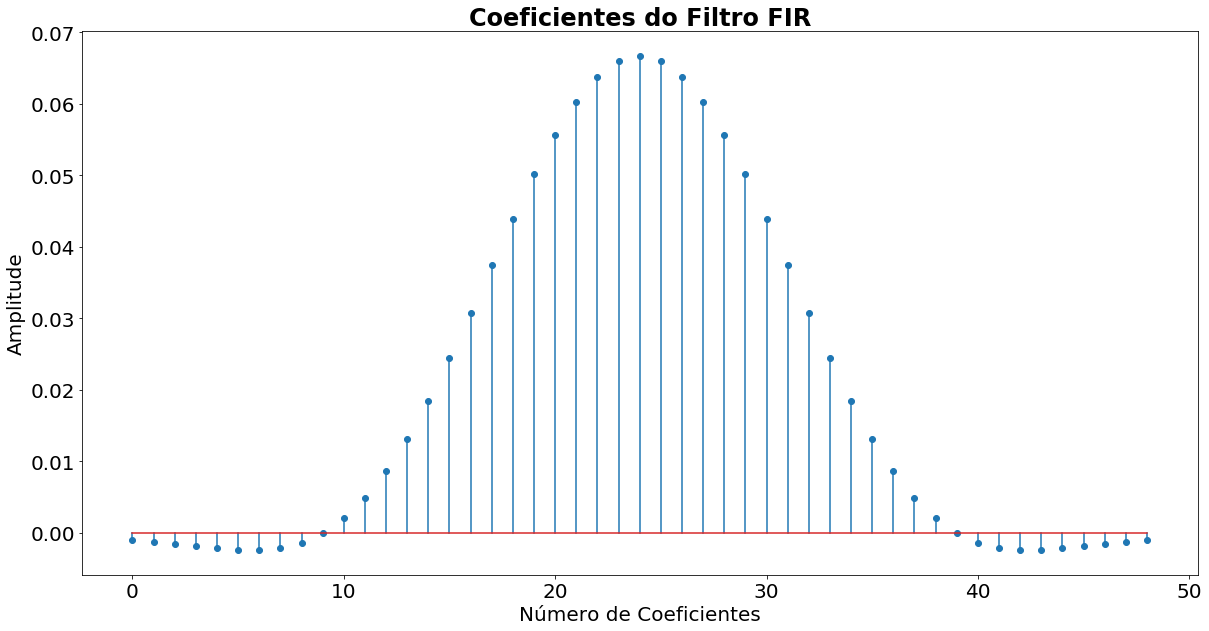

In [32]:
plt.figure(1, figsize=(20,10))
plt.title("Coeficientes do Filtro FIR", fontweight="bold")
plt.xlabel("Número de Coeficientes")
plt.ylabel("Amplitude")
plt.stem(b.T)
print(fir_lp.getWindow())
b.size

In [33]:
sig_raw = sig_raw.reshape(sig_raw.size)
b = b.reshape(b.size)

y = np.convolve(sig_raw, b)


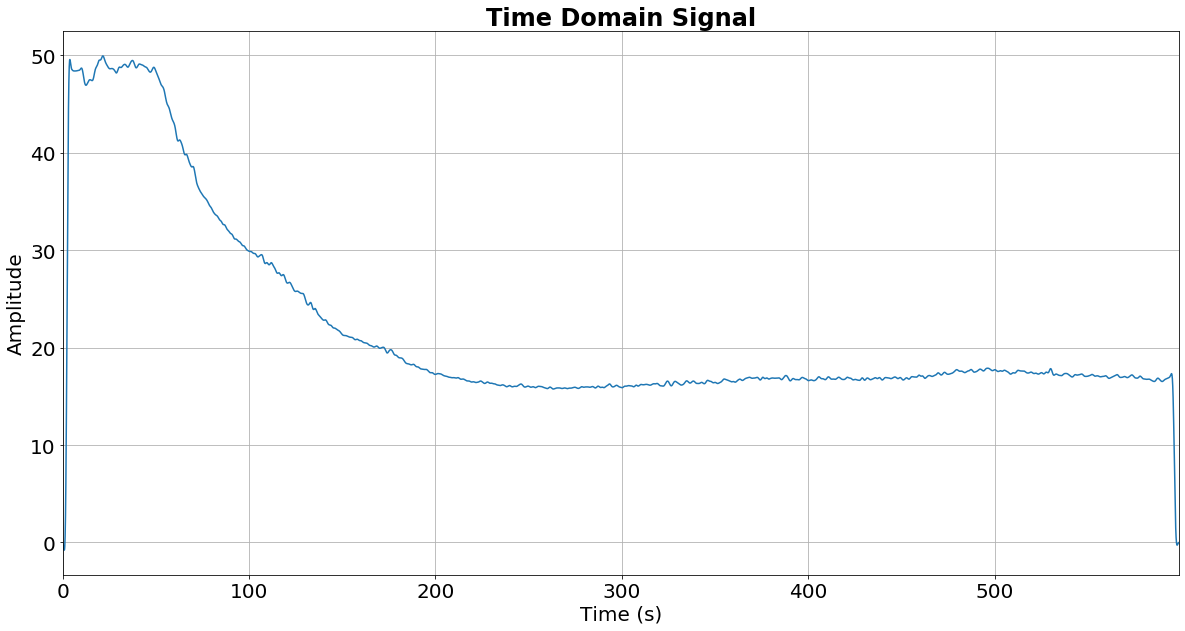

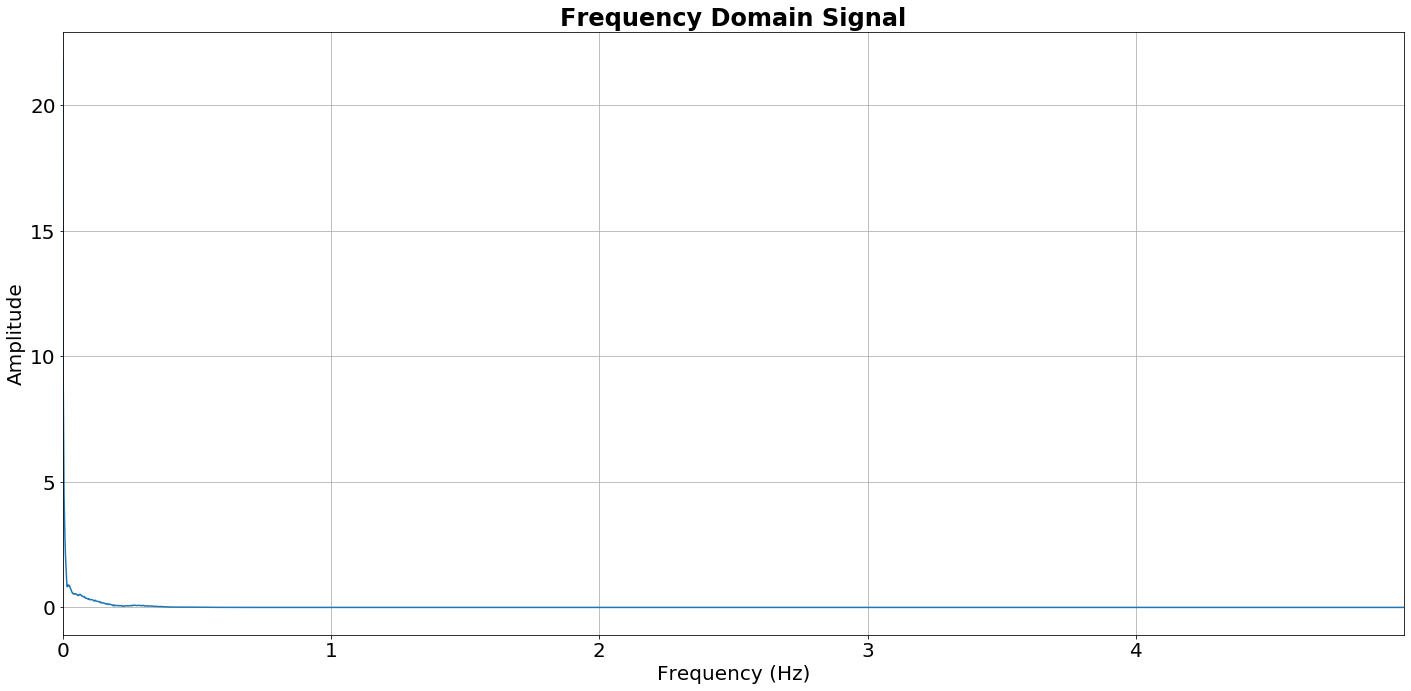

array([130778.68001335    +0.j        ,  23279.33369663-15849.9884828j ,
         6787.63616327-19050.64342542j, ...,
          288.7836687 +13492.7637171j ,   6787.63616327+19050.64342542j,
        23279.33369663+15849.9884828j ])

In [34]:
compute_and_plot_fft(y, Fs)

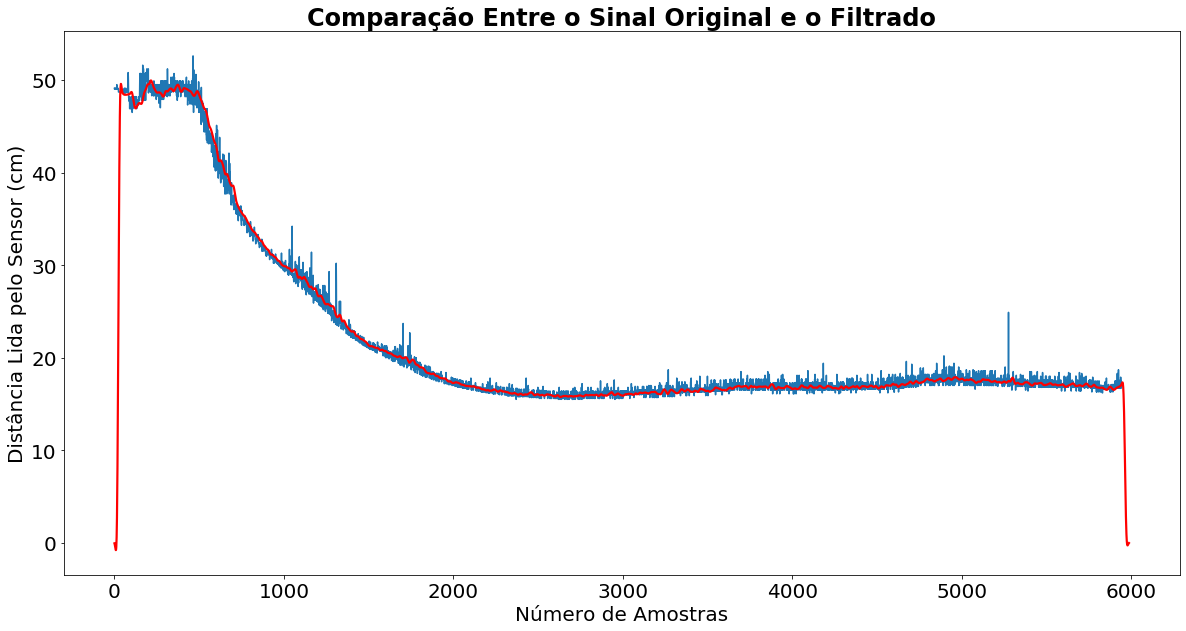

In [54]:
plt.figure(1, figsize=(20,10))
plt.title("Comparação Entre o Sinal Original e o Filtrado", fontweight="bold")
plt.xlabel("Número de Amostras")
plt.ylabel("Distância Lida pelo Sensor (cm)")
plt.plot(sig_raw)
plt.plot(y, color='r', linewidth = 2.2)

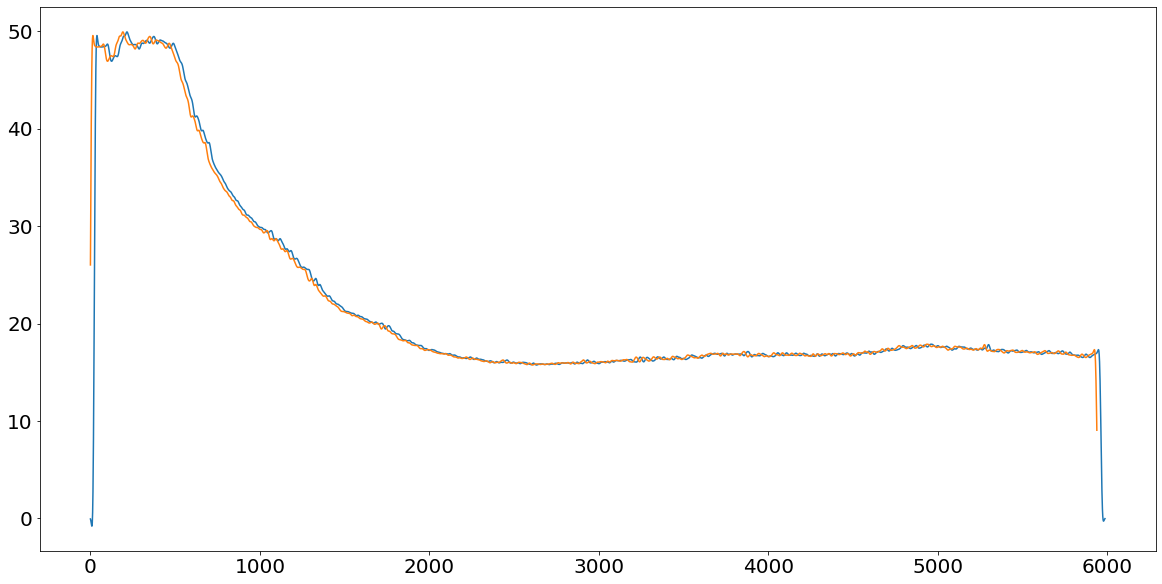

In [36]:
y1 = y[int(b.size/2):-int(b.size/2)]
plt.figure(1, figsize=(20,10))
plt.plot(y)
plt.plot(y1)

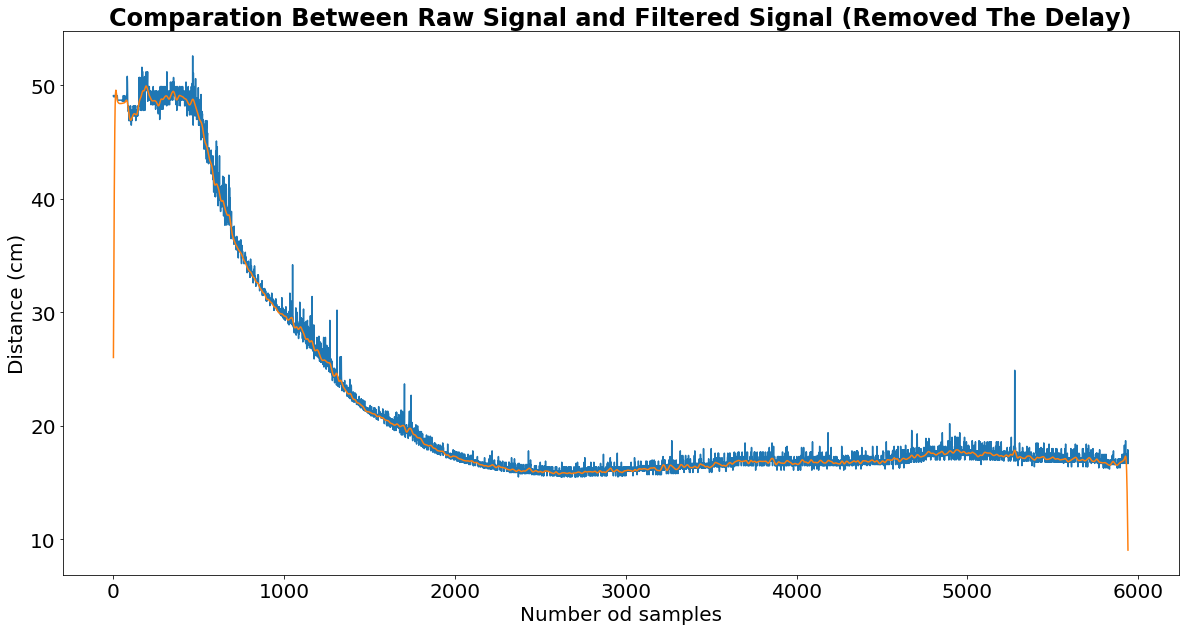

In [37]:
plt.figure(1, figsize=(20,10))
plt.title("Comparation Between Raw Signal and Filtered Signal (Removed The Delay)", fontweight="bold")
plt.xlabel("Number od samples")
plt.ylabel("Distance (cm)")
plt.plot(sig_raw)
plt.plot(y1)

In [38]:
from os.path import isfile
from os import remove

if isfile("filter_coeffs.txt"):
  remove("filter_coeffs.txt")

with open("filter_coeffs.txt", "a") as file:
  for coeff in b:
    file.write(str(coeff)+'\n')
  file.close()



In [39]:
max(y)

49.950540106425855

In [40]:
wf, hf = freqz(b.T, 1, worN=1024, fs=Fs)


Text(0.5, 1.0, 'Frequency Response')

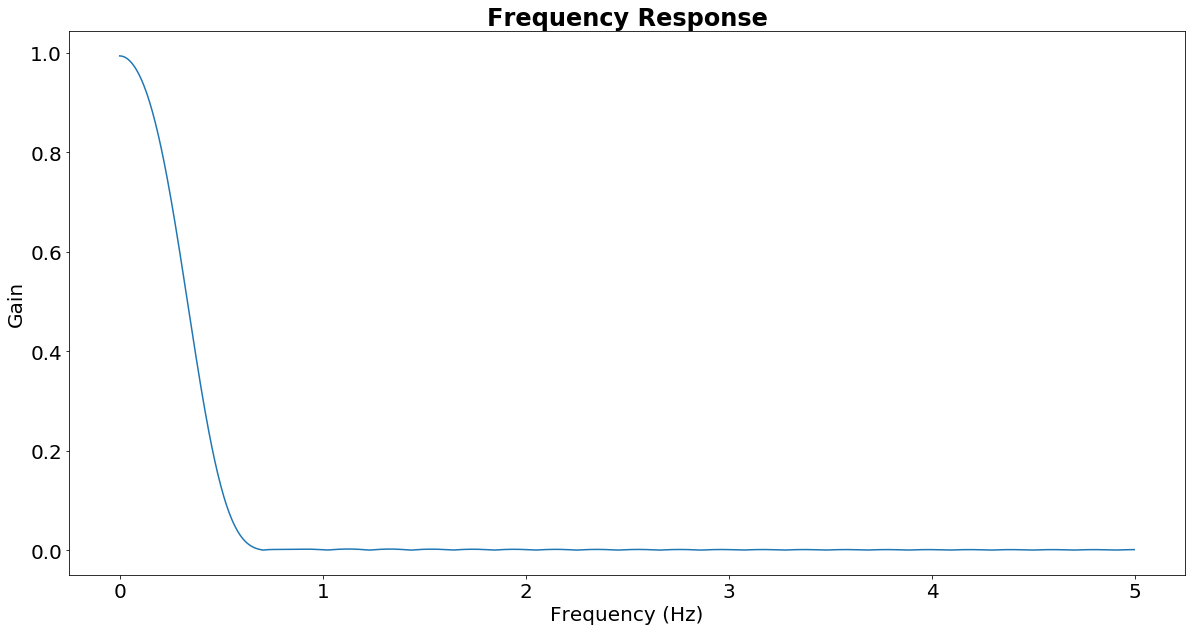

In [41]:
plt.figure(1, figsize=(20,10))
plt.plot(wf, np.absolute(hf))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.title("Frequency Response", fontweight="bold")


Text(0.5, 1.0, 'Resposta em Frequência do Filtro')

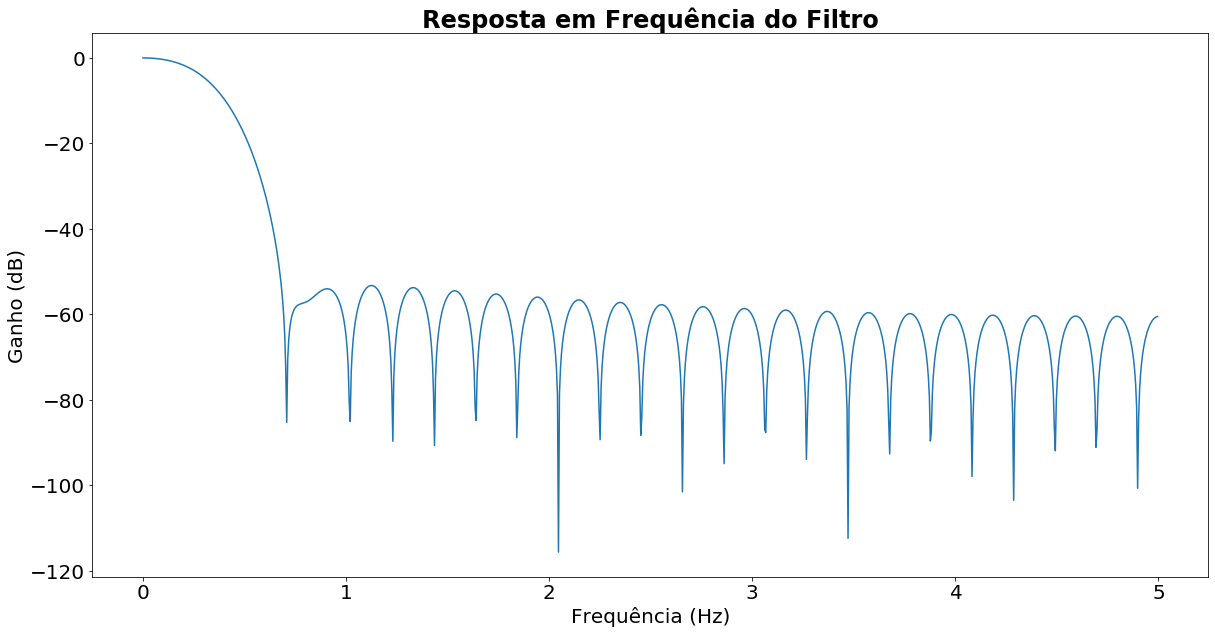

In [43]:
# Plotagem em dB
plt.figure(1, figsize=(20,10))
plt.plot(wf, 20*np.log10(np.absolute(hf)))
plt.xlabel("Frequência (Hz)")
plt.ylabel("Ganho (dB)")
plt.title("Resposta em Frequência do Filtro", fontweight="bold")